# <span style="color:#0b486b">  FIT3181: Deep Learning (2022)</span>
***
*CE/Lecturer:* Dr **Trung Le** | trunglm@monash.edu <br/>
*Head Tutor:* Mr **Thanh Nguyen** | thanh.nguyen4@monash.edu  <br/>
<br/>
Department of Data Science and AI, Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **Lee**  <br/>
Firstname: **Jian Hui**    <br/>
Student ID: **32116314**    <br/>
Email: **jlee0235@student.monash.edu**    <br/>
Your tutorial time: **Friday 2 to 4 pm**    <br/>
***


$$
    \theta
$$

# <span style="color:#0b486b">Deep Neural Networks</span>
### Due: <span style="color:red">11:59pm Sunday, 18 September 2022</span>  (Sunday)

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **20%** to your final mark. Read the assignment instruction carefully.

## <span style="color:#0b486b">Instruction</span>

This notebook has been prepared for your to complete Assignment 1. The theme of this assignment is about practical machine learning knowledge and skills in deep neural networks, including feedforward and convolutional neural networks. Some sections have been partially completed to help you get
started. **The total marks for this notebook is 100**.

* Before you start, read the entire notebook carefully once to understand what you need to do. <br/>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br>

This assignment contains **three** parts:

* Part 1: Questions on theory and knowledge on machine learning and deep learning **[30 points], 30%**
* Part 2: Coding assessment on TensorFlow for Deep Neural Networks (DNN) **[30 points], 30%**
* Part 3: Coding assessment on TensorFlow for Convolution Neural Networks (CNN) **[40 points], 40%**

**Hint**: This assignment was essentially designed based on the lectures and tutorials sessions covered from Week 1 to Week 6. You are strongly recommended to go through these contents thoroughly which might help you to complete this assignment.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to Moodle unit site. **By the due date, you are required to submit one  <span style="color:red; font-weight:bold">single zip file, named xxx_assignment01_solution.zip</span> where `xxx` is your student ID, to the corresponding Assignment (Dropbox) in Moodle**. 

***For example, if your student ID is <span style="color:red; font-weight:bold">12356</span>, then gather all of your assignment solution to folder, create a zip file named <span style="color:red; font-weight:bold">123456_assignment01_solution.zip</span> and submit this file.***

Within this zip folder, you **must** submit the following files:
1.	**Assignment01_solution.ipynb**:  this is your Python notebook solution source file.
1.	**Assignment01_output.html**: this is the output of your Python notebook solution *exported* in html format.
1.	Any **extra files or folder** needed to complete your assignment (e.g., images used in your answers).

Since the notebook is quite big to load and work together, one recommended option is to split solution into three parts and work on them seperately. In that case, replace **Assignment01_solution.ipynb** by three notebooks: **Assignment01_Part1_solution.ipynb**, **Assignment01_Part2_solution.ipynb** and **Assignment01_Part3_solution.ipynb**

**You can run your codes on Google Colab. In this case, you need to capture the screenshots of your Google Colab model training and put in corresponding places in your Jupyter notebook. You also need to store your trained models to folder <span style="color:red; font-weight:bold">*./models*</span> with recognizable file names (e.g., Part3_Sec3_2_model.h5).** 

### LIBRARY IMPORTS & CONSTANTS


In [68]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, models, layers
from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
import math
%matplotlib inline

# MY_SEED = 1234


## <span style="color:#0b486b">Part 1: Theory and Knowledge Questions</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 30 points]<span></div>

The first part of this assignment is for you to demonstrate your knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the lectures and tutorials from weeks 1 to 3**. Going through these materials before attempting this part is highly recommended.

####  <span style="color:red">**Question 1.1**</span> **Activation function plays an important role in modern Deep NNs. For each of the activation function below, state its output range, find its derivative (show your steps), and plot the activation fuction and its derivative**

<span style="color:red">**(a)**</span> Leaky ReLU: 
$
\text{LeakyReLU}\left( x \right)=
\begin{cases}
    0.01x & \text{if}\,x<0\\
    x & \text{otherwise}
\end{cases}\
$ 
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div> 

<span style="color:red">**(b)**</span> Softplus: $\text{Softplus}\left(x\right)=\text{ln}\left(1+e^{x}\right)$
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div> 

---
#### NOTE: i understand that gradient tape can be used here, but i didnt want to increase the complexity of an easy problem.

##### leaky ReLu:
- output range: $ - \infty \leq x \leq + \infty$
- derivative:
just have to derive for both separate ranges $ x < 0 $ and $ x \geq 0 $
$$
x = \begin{cases}
   0.01 &\text{if } x < 0 \\
   1 &\text{otherwise } x \geq 0
\end{cases}
$$

##### Softplus: 
- output range: $ 0 \leq x \leq + \infty $
- derivative:

$$
\begin{align*}
softplus'(x) & = \dfrac {1}{1 + e^x} (\dfrac {\partial}{\partial x} (1 + e^x)) \\
& = \dfrac {e^x}{1 + e^x} 
\end{align*}
$$


### Plots for LeakyReLU and Softplus


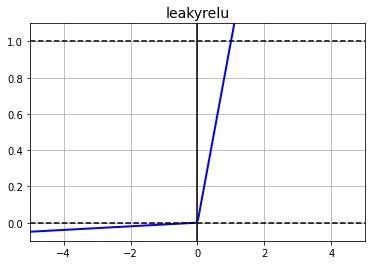

In [69]:
def leakyrelu(x):
    if x < 0:
        return 0.01*x
    else:
        return x


x = np.linspace(-5, 5, 200)

y = []
for i in range(len(x)):
    y.append(leakyrelu(x[i]))

plt.plot(x, y, "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-5, 5], 'k-')
plt.grid(True)
plt.title(r"leakyrelu", fontsize=14)
plt.axis([-5, 5, -0.1, 1.1])
plt.show()


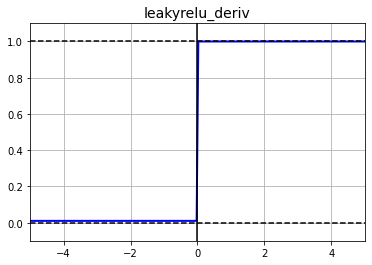

In [70]:
def leakyrelu_deriv(x):
    return 0.01 if x < 0 else 1

x = np.linspace(-5, 5, 200)

y = []
for i in range(len(x)):
    y.append(leakyrelu_deriv(x[i]))

plt.plot(x, y, "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-5, 5], 'k-')
plt.grid(True)
plt.title(r"leakyrelu_deriv", fontsize=14)
plt.axis([-5, 5, -0.1, 1.1])
plt.show()

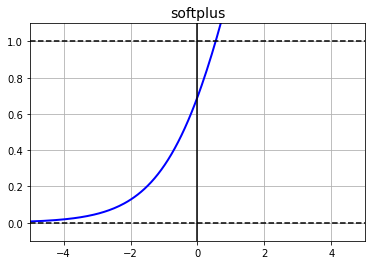

In [71]:
def softplus(x):
    # ln(1 + e^x)
    return math.log(1 + math.e ** x)

x = np.linspace(-5, 5, 200)

y = []
for i in range(len(x)):
    y.append(softplus(x[i]))

plt.plot(x, y, "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-5, 5], 'k-')
plt.grid(True)
plt.title(r"softplus", fontsize=14)
plt.axis([-5, 5, -0.1, 1.1])
plt.show()

<span style="color:#0b486b"> **Numpy is possibly being used in the following questions. You need to import numpy here.** </span>

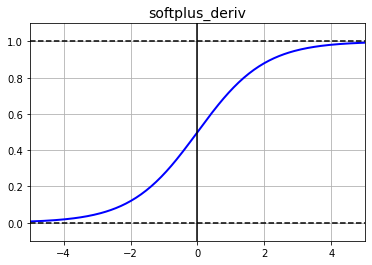

In [72]:
def softplus_deriv(x):
    # e^x / (1 + e^x)
    return (math.e ** x) / ( 1 + math.e ** x)


x = np.linspace(-5, 5, 200)


y = []
for i in range(len(x)):
    y.append(softplus_deriv(x[i]))



plt.plot(x, y, "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-5, 5], 'k-')
plt.grid(True)
plt.title(r"softplus_deriv", fontsize=14)
plt.axis([-5, 5, -0.1, 1.1])
plt.show()

####  <span style="color:red">**Question 1.2**</span> **Assume that we feed a data point $x$ with a ground-truth label $y=2$ to the feed-forward neural network with the ReLU activation function as shown in the following figure**|
<img src="Figures/Q2_P1.png" width="500" align="center"/>


**You need to show both formulas and numerical results for earning full mark. Although it is optional, it is great if you show your numpy code for your computation.**

In [73]:
def relu(x): return max(0,x)

def softmax(lst): 
     return np.exp(lst)/sum(np.exp(lst))
     

x = [1,
     -1,
     1]

<span style="color:red">**(a)**</span>  What is the numerical value of the latent presentation $h^1(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

In [74]:

"""
1. (h1)' = w1 * x + b1     [this is the first layer, but this includes all neurons at the first layer]
    - have to multiply
    - order matters
2. h1 = activation_func(h1')
"""


w1 = np.array([[1, -1, 1],
               [1, -1, -1],
               [2, -1, 2],
               [-1, -2, 1]])

b1 = np.array([1, 0, 1, 0])  # keep in mind that we should treat this as a transposed vector, so 1x4 should be 4x1
print()

h1_bar = np.matmul(w1, x)
print(h1_bar.shape)
print(h1_bar)

h1_bar = np.add(h1_bar, b1)
print(h1_bar.shape)
print(b1.shape)

f = np.vectorize(relu)
h1 = f(h1_bar)

print(h1_bar)
print(h1)



(4,)
[3 1 5 2]
(4,)
(4,)
[4 1 6 2]
[4 1 6 2]



<span style="color:red">**(b)**</span>  What is the numerical value of the latent presentation $h^2(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 


In [75]:
"""
h2_bar = w2 * h1 + b2
h2 = activation(h2_bar)
"""
w2 = np.array([[1, -1, -1, 2],
               [1, -1, 1, -1],
               [-1, 2, -1, 2]])
b2 = np.array([1, 1, 0])

h2_bar = np.matmul(w2, h1)
h2_bar = np.add(h2_bar, b2)

f = np.vectorize(relu)
h2 = f(h2_bar)

print(h2_bar)
print(h2)






[ 2  8 -4]
[2 8 0]


<span style="color:red">**(c)**</span>  What is the numerical value of the logit $h^3(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 


In [76]:
"""
h3_bar = w3 * h2 + b3
h3 = activation(h3_bar)
"""
w3 = np.array([[1, -2, 1],
               [1, 2, -1],
               [-1, 1, -1]])
b3 = np.array([0, 0, 0])

h3 = np.matmul(w3, h2)
print(h3)




[-14  18   6]


<span style="color:red">**(d)**</span>  What is the corresonding prediction probabilities $p(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 


In [77]:
# probabilities, p(x) = softmax(h3(x))
h3 = [float(x) for x in h3]
h3_tensor = tf.constant(name="h3", value=h3, dtype= tf.float32)

probs = tf.nn.softmax(h3_tensor)
probs  # correct, cross checked with desmos calc
print(probs)
print(probs.get_shape())


tf.Tensor([1.2664087e-14 9.9999380e-01 6.1441742e-06], shape=(3,), dtype=float32)
(3,)


<span style="color:red">**(e)**</span>  What is the cross-entropy loss caused by the feed-forward neural network at $(x,y)$? Remind that $y=2$.
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

 
In the second version of the formula, the p and q in this case are y labels AND the prediction probabilities respectively.

$𝑝_𝑚𝑥=𝑝(𝑦=𝑚|𝑥)$ is the probability to classify 𝑥 to the class 𝑚 for $1 \leq 𝑚 \leq 𝑀$.

this relies on the fact the the label is a one-hot-vector (either only 0 or 1).



when given the ground-truth label y = 2, that would mean that the corresponding grouth truth one-hot-vector for the label is y = [0,1,0].

---
the formula of CE loss (2 versions but are interchangable):

### FIRST
$$
\begin{align*}
    CE(p,q) & = - \sum_{m=1}^{M} log p_{y_i}(x_i) 
\end{align*}
$$
----
### SECOND: a generalized version of CE loss.

$$
\begin{align*}
    CE(p,q) & = - \sum_{m=1}^{M} p_m log(q_m) \\
    & = - [ 0 * log(p^1x) + 1 * log(p^2x) + 0 * log(p^3x) ]
\end{align*}
$$






In [78]:
labels = [0,1,0]
first_part = labels * np.log(probs)
print(first_part)
ce = -np.sum(labels * np.log(probs))   # sum of the negative logs
print(ce)

[-0.00000000e+00 -6.19890216e-06 -0.00000000e+00]
6.198902156029362e-06



<span style="color:red">**(f)**</span>  Assume that we are applying the label smoothing technique (i.e.,  [link for main paper](https://papers.nips.cc/paper/2019/file/f1748d6b0fd9d439f71450117eba2725-Paper.pdf) from Goeff Hinton) with $\alpha = 0.1$. What is the relevant loss caused by the feed-forward neural network at $(x,y)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

In [79]:
# 1: define label smoothing function

def label_smooth(y_k, alpha, K):
    """
    The label smoothing function

    Args:
        y_k: the original y label
        alpha: the label smoothing parameter
        K: the number of classes there are
    """
    y_k, K = float(y_k), float(K)
    
    # based on the formula propseod by the research paper in 1.1 preliminaries
    modified = y_k * (1 - alpha) + alpha/K
    
    return modified 

# 2: calc the CE loss using smoothed labels
smoothed_labels = [label_smooth(y_k=label, alpha=0.1, K=len(labels)) for label in labels]
print(f"smoothed_labels: {smoothed_labels}")
smooth_ce = -np.sum( smoothed_labels * np.log(probs))
print(f"smooth_ce: {smooth_ce}")


smoothed_labels: [0.03333333333333333, 0.9333333333333333, 0.03333333333333333]
smooth_ce: 1.4666729291458371


####  <span style="color:red">**Question 1.3**</span> **Assume that we are constructing a multilayered feed-forward neural network for a classification problem with three classes where the model parameters will be generated randomly using your student ID. The architecture of this network is ($3 (Input)\rightarrow4(LeakyReLU)\rightarrow 3(Output)$) as shown in the following figure. Note that the LeakyReLU has the same formula as the one in Q1.1.**


<img src="Figures/Q3_P1.png" width="500" align="center"/>

We feed a feature vector $x=\left[\begin{array}{ccc}
1 & -1 & 1.5\end{array}\right]^{T}$ with ground-truth label $y=3$ to the above network. 


**You need to show both formulas, numerical results, and your numpy code for your computation for earning full marks.**

In [80]:
#Code to generate random matrices and biases for W1, b1, W2, b2
import numpy as np
# TODO: change
STUDENT_ID = 32116314           #insert your student id here for example 1234    

np.random.seed(STUDENT_ID)
W1 = np.random.rand(4,3)
print(W1)
b1 = np.random.rand(4,)  # changed from (4,1) to (4,) to make things easier in a vector form 
print(b1)
W2 = np.random.rand(3,4)
print(W2)
b2 = np.random.rand(3,)
print(b2)

x = np.array([1, -1, 1.5])

[[0.55743135 0.36949385 0.56827969]
 [0.82003266 0.85314316 0.51837443]
 [0.20115403 0.53609295 0.46779608]
 [0.83119858 0.12899386 0.91942002]]
[0.6621174  0.99488478 0.43373089 0.0377466 ]
[[0.33346435 0.04532525 0.86090495 0.9573627 ]
 [0.26253249 0.23428983 0.65721148 0.20425296]
 [0.13590971 0.5057504  0.9932175  0.96747954]]
[0.55020448 0.06553801 0.84051767]


**Forward propagation**

<span style="color:red">**(a)**</span>  What is the value of $\bar{h}^{1}(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

$
\bar{h}^{1}(x) = W1 * X + b1
$

In [81]:
h1_bar = np.matmul(W1, x)
print(h1_bar)
print(h1_bar.shape)
print(b1.shape)
h1_bar = np.add(h1_bar, b1)
print(h1_bar)

[1.04035704 0.74445115 0.3667552  2.08133475]
(4,)
(4,)
[1.70247443 1.73933593 0.80048609 2.11908135]


<span style="color:red">**(b)**</span>  What is the value of $h^{1}(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

$
h^1(x)= leakyReLU(\bar{h}^{1}(x))
$

In [82]:
f = np.vectorize(leakyrelu)

h1 = f(h1_bar) # tested with neg values with leakyrelu ; works fine
print(h1)

[1.70247443 1.73933593 0.80048609 2.11908135]


<span style="color:red">**(c)**</span>  What is the predicted value $\hat{y}$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

$
logits: \space h^2(x) = W2 * h^1(x) + b2 \\ \\
$

$
p(x) = softmax(h^2(x)) \\
$

$
\hat{y} =  argmax(p_m) \space \space ; 1 \leq m \leq M ; \text{where M is how many categorical classes there are} \\
= max(p^1(x), p^2(x), ... \space, p^m(x)) \\
$


In [83]:

h2 = np.matmul(W2, h1)
print(f'h2: {h2}')

h2 = np.add(h2, b2)
print(f'h2: {h2}')

# f = np.vectorize(softmax)
pred_probs = tf.nn.softmax(h2)
print(f'pred_probs: {pred_probs}')

# y_hat is the index of the class which corresponds to the LARGEST prob value (after softmax)
y_hat = np.amax(pred_probs)
print(f'y_hat: {y_hat}')



h2: [3.36442227 1.81338085 3.95627729]
h2: [3.91462674 1.87891886 4.79679496]
pred_probs: [0.28195059 0.03681937 0.68123005]
y_hat: 0.6812300462658298


<span style="color:red">**(d)**</span>  Suppose that we use the cross-entropy (CE) loss. What is the value of the CE loss $l$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

we know the ground truth label, y = 3 ; so the one hot vector for labels = [0,0,1]

$$
\begin{align*}
    \text{CE loss, }l\text{ : }CE(p,q) & = - \sum_{m=1}^{M} p_m log(q_m) \\
    & = 0 * log(p^1x) + 0 * log(p^2x) + 1 * log(p^3x)
\end{align*}
$$

In [84]:
labels = np.array([0,0,1])
ce = -np.sum(labels * np.log(pred_probs))   # sum of the negative logs
print(ce)



0.3838552233186607


**Backward propagation**

<span style="color:red">**(e)**</span> What are the derivatives $\frac{\partial l}{\partial h^{2}},\frac{\partial l}{\partial W^{2}}$, and $\frac{\partial l}{\partial b^{2}}$? 
<div style="text-align: right"><span style="color:red">[6 points]</span></div>

#### From the 3rd layer, the output layer:
we will know the CE loss, hence we will know:
$$
\tag 1
g^2 = \frac {\partial l} {\partial h^2} = p^T - 1_y 
$$ 


From the above, and knowing that $h^2 = W^2h^1 + b^2$, we can also obtain partial derivatives $\frac {\partial l}{\partial W^2}$ and $\frac {\partial l}{\partial b^2}$ 

#### NOTE: there are tags attached below to each equation

---

$$
\tag 2
\frac{\partial l}{\partial W^{2}} 
= \frac {\partial l} {\partial h^2} * \frac {\partial h^2} {\partial W^2} 
= (g^2)^T(h^1)^T
$$

---

$$
\tag 3
\frac{\partial l}{\partial b^{2}} 
= \frac {\partial l}{\partial h^2} * \frac {\partial h^2}{\partial b^2} 
= g^2
$$


In [85]:

# equation 1
# print(pred_probs.shape)
# print(labels.shape)

g2 = np.subtract(pred_probs, labels)  # equation 1
g2 =  np.expand_dims(g2, axis=0)
# print(g2.shape)
print(f'g^2: {g2} \n')

# equation 2
h1 =  np.expand_dims(h1, axis=1)
# print(f' {g2.shape} {h1.shape}' )  
partial_l_w2 = np.matmul(np.transpose(g2), np.transpose(h1))
print(f'partial_l_w2 {partial_l_w2} \n' )  

# equation 3
partial_l_b2 = g2
print(f'partial_l_b2 {partial_l_b2} \n' )  






g^2: [[ 0.28195059  0.03681937 -0.31876995]] 

partial_l_w2 [[ 0.48001367  0.49040679  0.22569752  0.59747623]
 [ 0.06268403  0.06404125  0.02947339  0.07802323]
 [-0.5426977  -0.55444803 -0.25517091 -0.67549946]] 

partial_l_b2 [[ 0.28195059  0.03681937 -0.31876995]] 



<span style="color:red">**(f)**</span> What are the derivatives $\frac{\partial l}{\partial h^{1}}, \frac{\partial l}{\partial \bar{h}^{1}},\frac{\partial l}{\partial W^{1}}$, and $\frac{\partial l}{\partial b^{1}}$? 
<div style="text-align: right"><span style="color:red">[6 points]</span></div>

---
#### pre-requisite information:


$
\frac {\partial h^1} {\partial \bar{h}^1} = diag(\sigma'(\bar{h}^1))  \text{ ; } h^1 = \sigma(\bar{h}^1)
$

---



---
#### we shall use the above information from (e) to obtain the needed derivatives below:

$$
\tag 4
\begin{align*}
g^1 
&= \frac {\partial l}{\partial h^1} \\
&= \frac {\partial l}{\partial h^2} * \frac {\partial h^2}{\partial h^1} \\
&= g^2W^2 \\
\end{align*}
$$

---
$$
\tag 5
\begin{align*}
\bar{g}^1
&= \frac {\partial l}{\partial \bar{h}^1} \\
&= \frac {\partial l}{\partial h^1} * \frac {\partial h^1}{\partial \bar{h}^1} \\
&= g^1diag(\sigma'(\bar{h}^1)) \text{ ; $\sigma'$ is the derivative of leaky ReLU}\\   
\end{align*}
$$

---
$$
\tag 6
\begin{align*}
\frac{\partial l}{\partial W^{1}}
&= \frac {\partial l}{\partial \bar{h}^1} * \frac {\partial \bar{h}^1}{\partial W^1} \\
&= (\bar{g}^1)^T(h^0)^T \\
\end{align*}
$$

---
$$
\tag 7
\frac{\partial l}{\partial b^{1}} = \bar{g} ^ 1
$$




In [86]:
# equation 4
print(f'--------equation 4---------')
# print(g2.shape)
# print(W2.shape)
partial_l_h1 = np.matmul(g2, W2)
print(f'partial_l_h1: {partial_l_h1}')


# equation 5: [1xn1] x [n1xn1] → [1×𝑛1]
print(f'--------equation 5---------')
# print(h1_bar)
# print(partial_l_h1.shape)
# print(h1_bar.shape)

# the diag matrix of size [n1 x n1]
diag = np.array([leakyrelu_deriv(x) for x in h1_bar])
diag = np.diag(diag)
# print(f'diag shape: {diag.shape}')
# print(f'diag: \n {diag}')

partial_1_hbar1 = np.matmul(partial_l_h1, diag)
print(f'partial_1_hbar1: {partial_1_hbar1}')

# equation 6
print(f'--------equation 6---------')
expand_x = np.expand_dims(x,axis=1)
# print(f'partial_1_hbar1: {partial_1_hbar1} MULT x : {expand_x}')
# print(expand_x.shape)
partial_l_w1 = np.matmul(np.transpose(partial_1_hbar1), np.transpose(expand_x))
print(f"partial_l_w1: {partial_l_w1}")

# equation 7
print(f'--------equation 7---------')
partial_l_b1 = partial_1_hbar1
print(f"partial_l_b1: {partial_l_b1}")




--------equation 4---------
partial_l_h1: [[ 0.06036282 -0.13981215 -0.04967713 -0.03095397]]
--------equation 5---------
partial_1_hbar1: [[ 0.06036282 -0.13981215 -0.04967713 -0.03095397]]
--------equation 6---------
partial_l_w1: [[ 0.06036282 -0.06036282  0.09054423]
 [-0.13981215  0.13981215 -0.20971822]
 [-0.04967713  0.04967713 -0.07451569]
 [-0.03095397  0.03095397 -0.04643095]]
--------equation 7---------
partial_l_b1: [[ 0.06036282 -0.13981215 -0.04967713 -0.03095397]]


**SGD update**

<span style="color:red">**(g)**</span> Assume that we use SGD with learning rate $\eta=0.01$ to update the model parameters. What are the values of $W^2, b^2$ and $W^1, b^1$ after updating?
<div style="text-align: right"><span style="color:red">[5 points]</span></div>



1. we have the loss function over the training set, 
$ 
 J(\theta_t) = L(D,h) = \frac{1}{N} \sum_{i=1}^N CE(1_{y_i}, p(x_i)) = - \frac{1}{N} \sum_{i=1}^N log p_{y_i} (x_i) \\
$
D is the data set, h are the linear functions of each layer

2. use this loss function, calculate the first order derivative of loss function w.r.t $\theta$  :  
$
\nabla_\theta J(\theta_t) = \frac {\partial J}{\partial \theta} (\theta_t)
$

3. finally update the model parameters
$
\theta_{t+1} = \theta_t - \eta \nabla_\theta J(\theta_t)
$
- $ \text{new } W^2 = W^2 - \eta \frac{\partial l}{\partial W^2}$
- $ \text{new } b^2 = b^2 - \eta \frac{\partial l}{\partial b^2}$
- $ \text{new } W^1 = W^1 - \eta \frac{\partial l}{\partial W^1}$
- $ \text{new } b^1 = b^1 - \eta \frac{\partial l}{\partial b^1}$




In [87]:
# for one iteration
lr = 0.01

newW2 = W2 - lr * partial_l_w2
newb2 = b2 - lr * partial_l_b2
newW1 = W1 - lr * partial_l_w1
newb1 = b1 - lr * partial_l_b1

print(f'old W2: {W2} \n \n new W2: {newW2}\n')
print(f'old b2: {b2} \n \n  new b2: {newb2}\n')
print(f'old W1: {W1} \n \n new W1: {newW1}\n')
print(f'old b1: {b1} \n \n  new b1: {newb1}\n')



old W2: [[0.33346435 0.04532525 0.86090495 0.9573627 ]
 [0.26253249 0.23428983 0.65721148 0.20425296]
 [0.13590971 0.5057504  0.9932175  0.96747954]] 
 
 new W2: [[0.32866422 0.04042119 0.85864797 0.95138794]
 [0.26190565 0.23364942 0.65691675 0.20347273]
 [0.14133669 0.51129488 0.99576921 0.97423453]]

old b2: [0.55020448 0.06553801 0.84051767] 
 
  new b2: [[0.54738497 0.06516982 0.84370537]]

old W1: [[0.55743135 0.36949385 0.56827969]
 [0.82003266 0.85314316 0.51837443]
 [0.20115403 0.53609295 0.46779608]
 [0.83119858 0.12899386 0.91942002]] 
 
 new W1: [[0.55682773 0.37009748 0.56737424]
 [0.82143078 0.85174504 0.52047161]
 [0.2016508  0.53559617 0.46854124]
 [0.83150812 0.12868432 0.91988432]]

old b1: [0.6621174  0.99488478 0.43373089 0.0377466 ] 
 
  new b1: [[0.66151377 0.9962829  0.43422766 0.03805614]]

